In [4]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

f = open('train.pkl','rb')
data = pickle.load(f)
print(data)

                                               customer_ID         S_2  \
0        0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-03-09   
1        0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-04-07   
2        0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-05-28   
3        0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-06-13   
4        0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-07-16   
...                                                    ...         ...   
5531446  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...  2017-11-05   
5531447  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...  2017-12-23   
5531448  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...  2018-01-06   
5531449  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...  2018-02-06   
5531450  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...  2018-03-14   

              P_2      D_39       B_1       B_2       R_1       S_3      D_41  \
0        0.938477  0.001734  0

In [2]:
data.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,...,NaN,NaN,0.002426,0.003706,0.003819,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,...,NaN,NaN,0.003956,0.003166,0.005032,NaN,0.009575,0.005493,0.009216,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954102,0.091492,0.021652,1.009766,0.006817,0.123962,0.007599,0.009422,...,NaN,NaN,0.003269,0.007328,0.000427,NaN,0.003429,0.006985,0.002604,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960449,0.002455,0.013687,1.002930,0.001372,0.117188,0.000685,0.005531,...,NaN,NaN,0.006119,0.004517,0.003201,NaN,0.008423,0.006527,0.009598,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947266,0.002483,0.015190,1.000977,0.007607,0.117310,0.004654,0.009308,...,NaN,NaN,0.003672,0.004944,0.008888,NaN,0.001670,0.008125,0.009827,0


<AxesSubplot:xlabel='target', ylabel='count'>

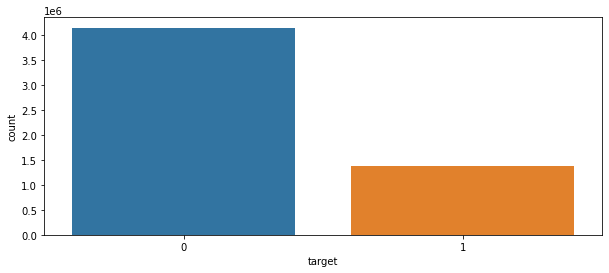

In [5]:
plt.figure(figsize=(10,4))
sns.countplot(data=data, x ='target')

In [7]:
#drop variables with missing values >=75% in the train dataframe
i=0
for col in data.columns:
    if (data[col].isnull().sum()/len(data[col])*100) >=75:
        print("Dropping column", col)
        data.drop(labels=col,axis=1,inplace=True)
        i=i+1
        
print("Total number of columns dropped in train dataframe", i)

Dropping column D_42
Dropping column D_49
Dropping column D_66
Dropping column D_73
Dropping column D_76
Dropping column R_9
Dropping column B_29
Dropping column D_87
Dropping column D_88
Dropping column D_106
Dropping column R_26
Dropping column D_108
Dropping column D_110
Dropping column D_111
Dropping column B_39
Dropping column B_42
Dropping column D_132
Dropping column D_134
Dropping column D_135
Dropping column D_136
Dropping column D_137
Dropping column D_138
Dropping column D_142
Total number of columns dropped in train dataframe 23


In [ ]:
# Lets extract columns names for easy access
D_columns = [col for col in train_df.columns if 'D_' in col]
print ("Total number of columns starting with D is", len(D_columns))
print("###############################")
# segregate D Columns for easier access using regex
# regex to capture column name with D_$$ (D_ and 2 digit number suffix)
d_col1 = "D_[0-9][0-9]$$"
# regex to capture column name with D_$$$ (D_ and 3 digit number suffix)
d_col2 = "D_[0-9][0-9][0-9]$$$"
# get first set of column name which matches regex for d_col1
D_columns1 = [col for col in train_df.columns if re.match(d_col1,col)]
print ("First set of columns starting with D is", len(D_columns1))
print(D_columns1)
# get second set of column name which matches regex for d_col2
D_columns2 = [col for col in train_df.columns if re.match(d_col2,col)]
print ("Second set of columns starting with D is", len(D_columns2))
print(D_columns2)
print ("Total Number of columns starting with D is", len(D_columns2)+len(D_columns1))
print("###############################")
S_columns = [col for col in train_df.columns if 'S_' in col]
print ("Total number of columns starting with S is", len(S_columns))
print(S_columns)
print("###############################")
P_columns = [col for col in train_df.columns if 'P_' in col]
print ("Total number of columns starting with P is", len(P_columns))
print(P_columns)
print("###############################")
B_columns = [col for col in train_df.columns if 'B_' in col]
print ("Total number of columns starting with B is", len(B_columns))
print(B_columns)
print("###############################")
R_columns = [col for col in train_df.columns if 'R_' in col]
print ("Toal number of columns starting with R is", len(R_columns))
print(R_columns)
print("###############################")
total_columns = len(D_columns1)+len(D_columns2)+len(S_columns)+len(P_columns)+len(B_columns)+len(R_columns)
print("Total number of D, S, P, B, R variables(columns) per customer_ID  is",total_columns)
print("###############################")